## Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


## Data Exploration

In [2]:
data = pd.read_csv("SocialMediaData.csv")

In [3]:
data.head()

,UserID,Name,Gender,DOB,Interests,City,Country,FacebookFollowers,FacebookPostsNumber,FacebookAvgTime,InstagramFollowers,InstagramPostsNumber,InstagramAvgTime,TikTokFollowers,TikTokPostsNumber,TikTokAvgTime
0,1,Jesse Lawhorn,Female,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia,2992,281,3.760587,606,81,7.636315,704,101,1.000000
1,2,Stacy Payne,Female,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya,1939,225,22.512139,7812,67,1.000000,6831,269,63.133947
2,3,Katrina Nicewander,Female,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan,1150,156,52.301919,693,170,120.000000,9600,691,17.473620
3,4,Eric Yarbrough,Male,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy,865,89,7.081925,2853,95,53.754694,25353,88,31.649215
4,5,Daniel Adkins,Female,1955-09-18,"'Politics', 'History'",Biruaca,Venezuela,6684,160,10.209453,2784,331,18.055019,6067,222,19.317960


In [4]:
data.describe()

,UserID,FacebookFollowers,FacebookPostsNumber,FacebookAvgTime,InstagramFollowers,InstagramPostsNumber,InstagramAvgTime,TikTokFollowers,TikTokPostsNumber,TikTokAvgTime
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,3037.154120,151.139790,20.088141,4104.15819,211.933030,29.480141,5214.331030,271.483450,37.999425
std,28867.657797,19147.372091,119.164992,20.197228,18117.75240,165.038279,27.968831,18759.361785,211.608165,33.682540
min,1.000000,500.000000,50.000000,1.000000,600.00000,60.000000,1.000000,700.000000,70.000000,1.000000
25%,25000.750000,1074.000000,79.000000,5.759044,1465.00000,104.000000,8.592542,1838.000000,128.000000,11.348105
50%,50000.500000,1882.000000,119.000000,13.849597,2686.00000,165.000000,20.738006,3478.000000,208.000000,27.598136
75%,75000.250000,3265.000000,188.000000,27.727018,4754.00000,269.000000,41.599634,6288.000000,347.000000,55.318834
max,100000.000000,996002.000000,4998.000000,299.000000,994402.00000,4991.000000,300.000000,996797.000000,4864.000000,299.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   UserID                100000 non-null  int64  
 1   Name                  100000 non-null  object 
 2   Gender                100000 non-null  object 
 3   DOB                   100000 non-null  object 
 4   Interests             100000 non-null  object 
 5   City                  100000 non-null  object 
 6   Country               100000 non-null  object 
 7   FacebookFollowers     100000 non-null  int64  
 8   FacebookPostsNumber   100000 non-null  int64  
 9   FacebookAvgTime       100000 non-null  float64
 10  InstagramFollowers    100000 non-null  int64  
 11  InstagramPostsNumber  100000 non-null  int64  
 12  InstagramAvgTime      100000 non-null  float64
 13  TikTokFollowers       100000 non-null  int64  
 14  TikTokPostsNumber     100000 non-null  int64  
 15  T

In [6]:
data.shape

(100000, 16)

In [7]:
data.isnull().sum()

UserID                  0
Name                    0
Gender                  0
DOB                     0
Interests               0
City                    0
Country                 0
FacebookFollowers       0
FacebookPostsNumber     0
FacebookAvgTime         0
InstagramFollowers      0
InstagramPostsNumber    0
InstagramAvgTime        0
TikTokFollowers         0
TikTokPostsNumber       0
TikTokAvgTime           0
dtype: int64

In [8]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [9]:
data = data.drop("UserID", axis=1)


## Correlation Heatmap

In [10]:
numeric_columns = [
    'FacebookFollowers', 'FacebookPostsNumber', 'FacebookAvgTime',
    'InstagramFollowers', 'InstagramPostsNumber', 'InstagramAvgTime',
    'TikTokFollowers', 'TikTokPostsNumber', 'TikTokAvgTime'
]

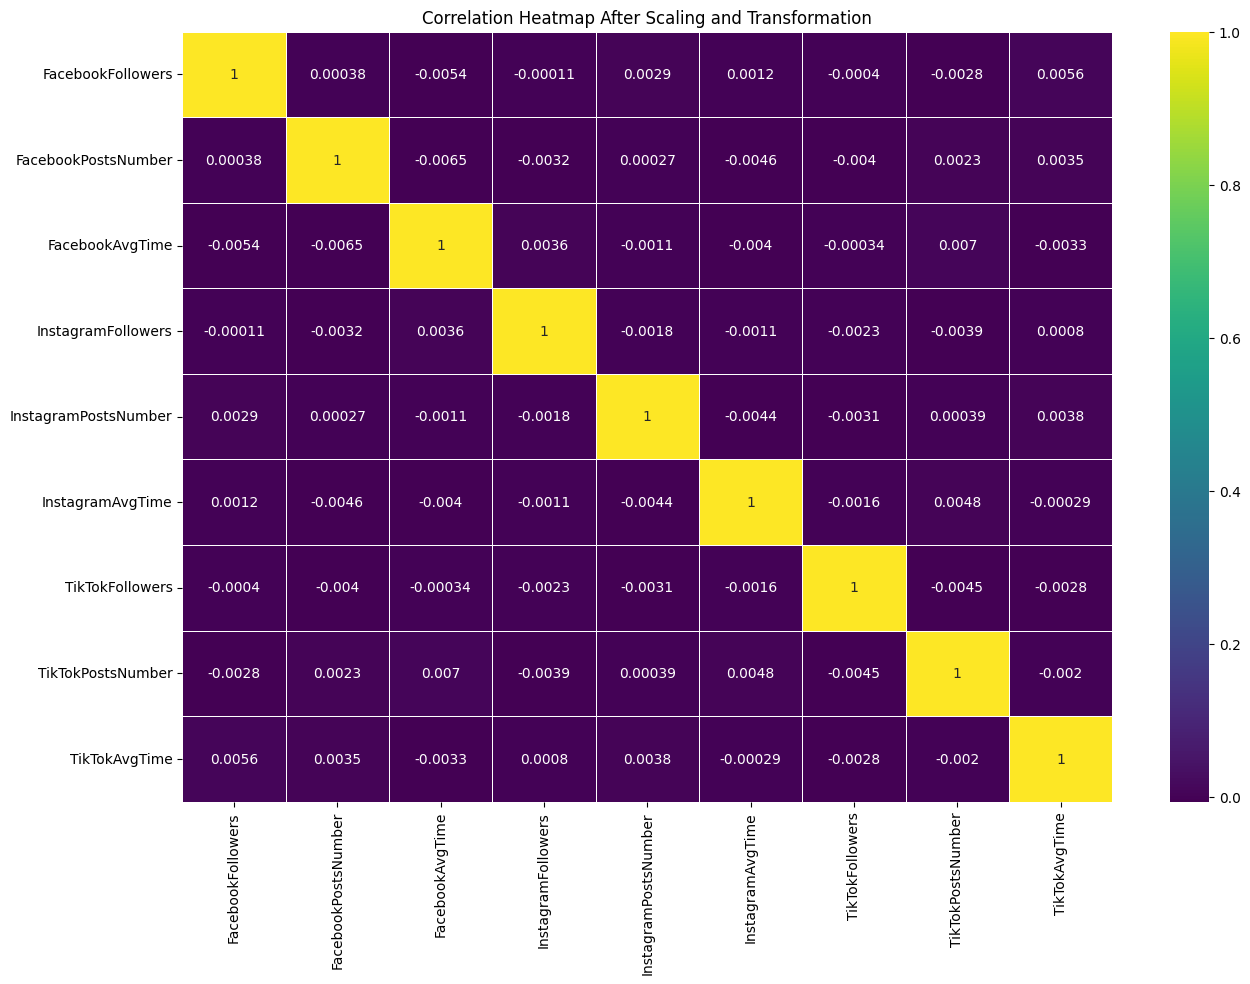

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Pairplot of Numeric Features

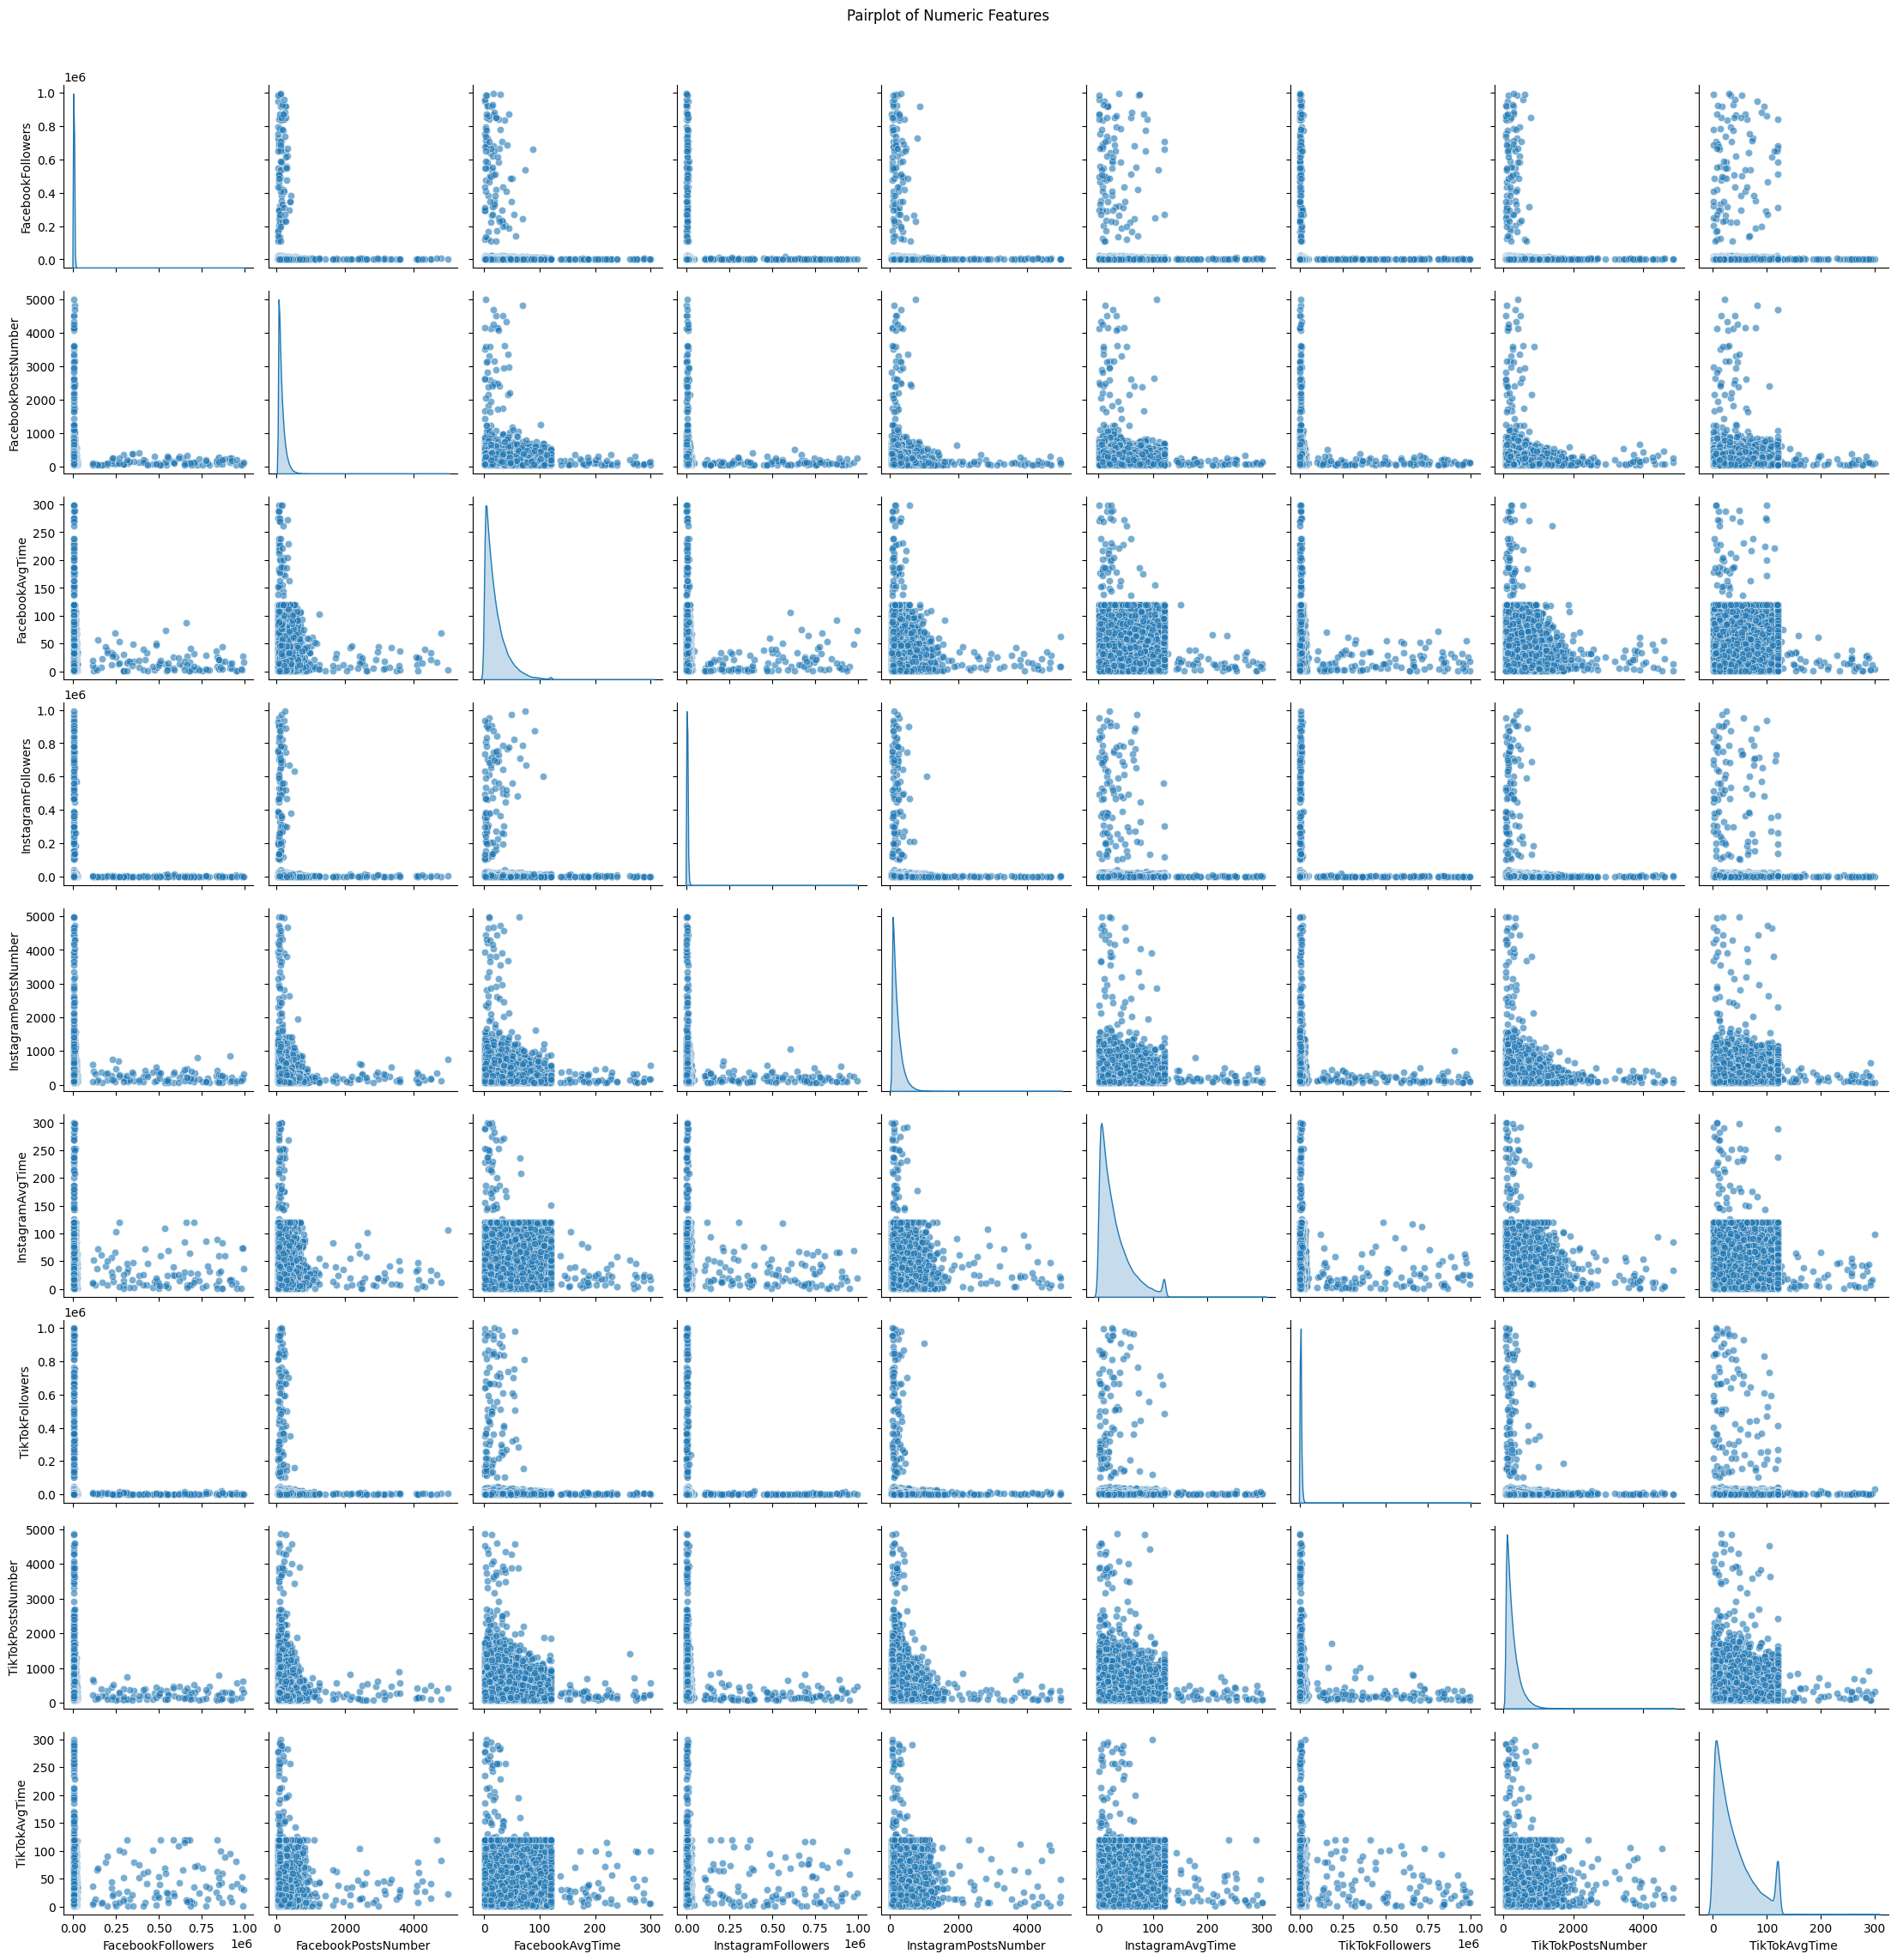

In [12]:
sns.pairplot(data[numeric_columns], diag_kind="kde", plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

## Boxplots for Outliers Detection

C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\296277659.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\296277659.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\296277659.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\296277659.py:4: FutureWarning: 

Passing `palette`

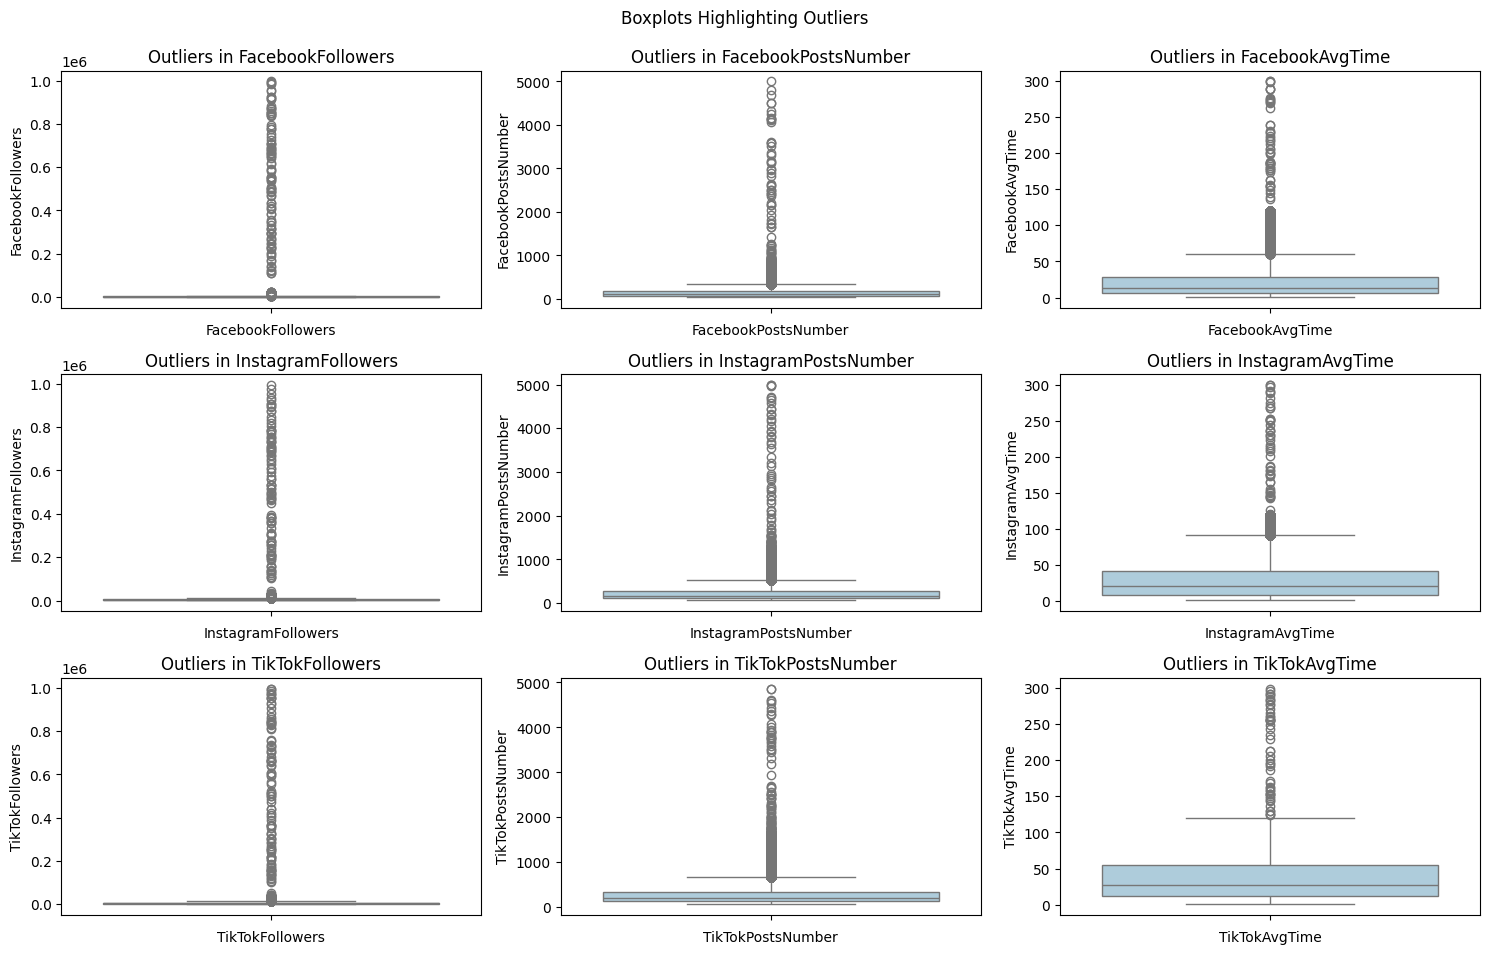

In [13]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=data[column], palette='Paired')
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.suptitle('Boxplots Highlighting Outliers', y=1.02)
plt.show()

## Outliers Detection Using IQR

In [11]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_dict = {col: detect_outliers_iqr(data, col) for col in numeric_columns}
for col, outliers in outliers_dict.items():
    print(f"{col}: {len(outliers)} outliers detected")

FacebookFollowers: 4953 outliers detected
FacebookPostsNumber: 4986 outliers detected
FacebookAvgTime: 4866 outliers detected
InstagramFollowers: 4967 outliers detected
InstagramPostsNumber: 4801 outliers detected
InstagramAvgTime: 4805 outliers detected
TikTokFollowers: 4759 outliers detected
TikTokPostsNumber: 4977 outliers detected
TikTokAvgTime: 50 outliers detected


## Capping Outliers

In [12]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)

for col in numeric_columns:
    cap_outliers(data, col)

print("Outliers capped.")

Outliers capped.


## To make sure that is capped 

C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\296277659.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\296277659.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\296277659.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[column], palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\296277659.py:4: FutureWarning: 

Passing `palette`

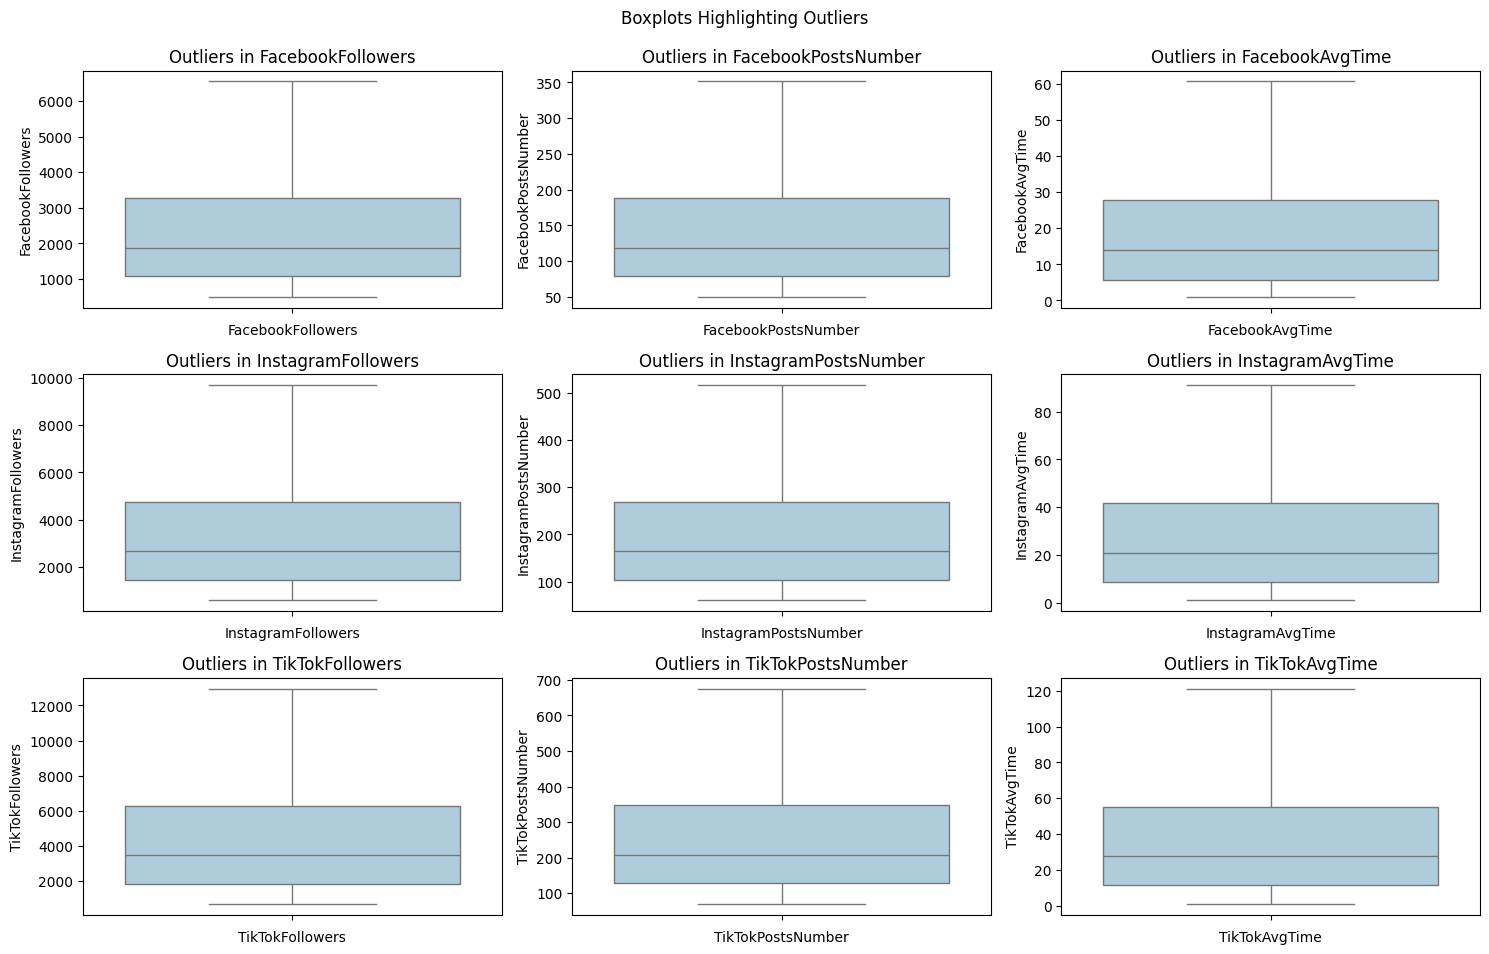

In [16]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=data[column], palette='Paired')
    plt.title(f'Outliers in {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.suptitle('Boxplots Highlighting Outliers', y=1.02)
plt.show()

## Distribution of Numeric Features

C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\188626085.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column], kde=True, bins=20, palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\188626085.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column], kde=True, bins=20, palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\188626085.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column], kde=True, bins=20, palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\188626085.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column], kde=True, bins=20, palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\188626085.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[c

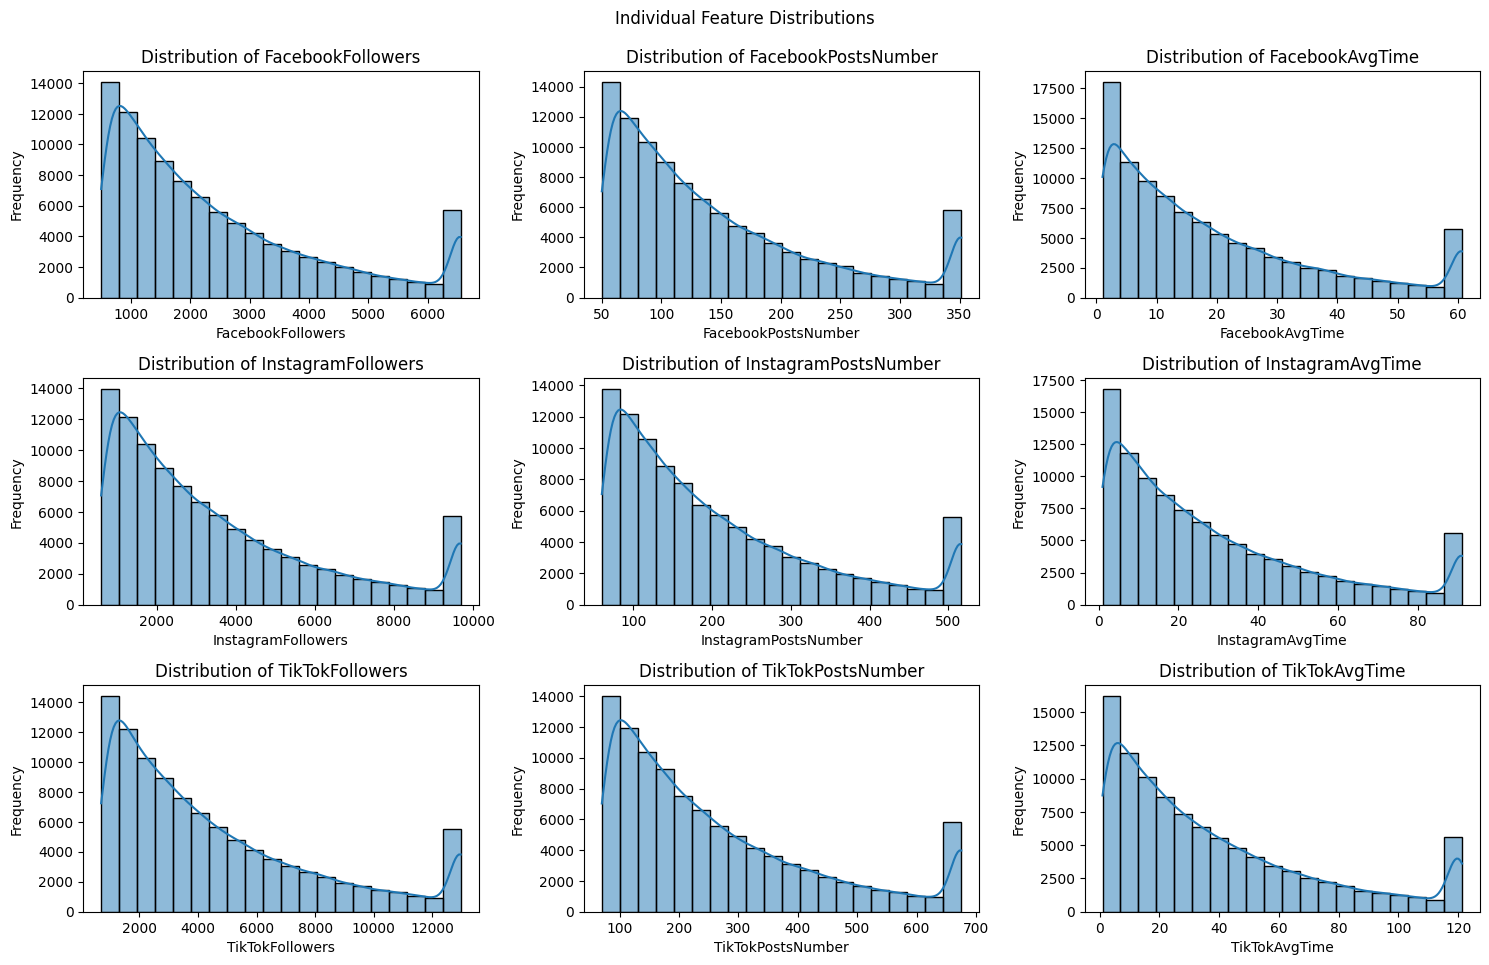

In [17]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True, bins=20, palette='Paired')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Individual Feature Distributions', y=1.02)
plt.show()

## Skewness of Numeric Features

In [13]:
from scipy.stats import skew
skewness_values = {col: skew(data[col].dropna()) for col in numeric_columns}
print("Skewness of Numeric Columns:")
for col, skewness in skewness_values.items():
    print(f"{col}: {skewness:.2f}")

Skewness of Numeric Columns:
FacebookFollowers: 1.06
FacebookPostsNumber: 1.06
FacebookAvgTime: 1.07
InstagramFollowers: 1.06
InstagramPostsNumber: 1.06
InstagramAvgTime: 1.07
TikTokFollowers: 1.06
TikTokPostsNumber: 1.06
TikTokAvgTime: 1.05


C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\4063822220.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column], kde=True, bins=30, palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\4063822220.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column], kde=True, bins=30, palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\4063822220.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column], kde=True, bins=30, palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\4063822220.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column], kde=True, bins=30, palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_12228\4063822220.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(d

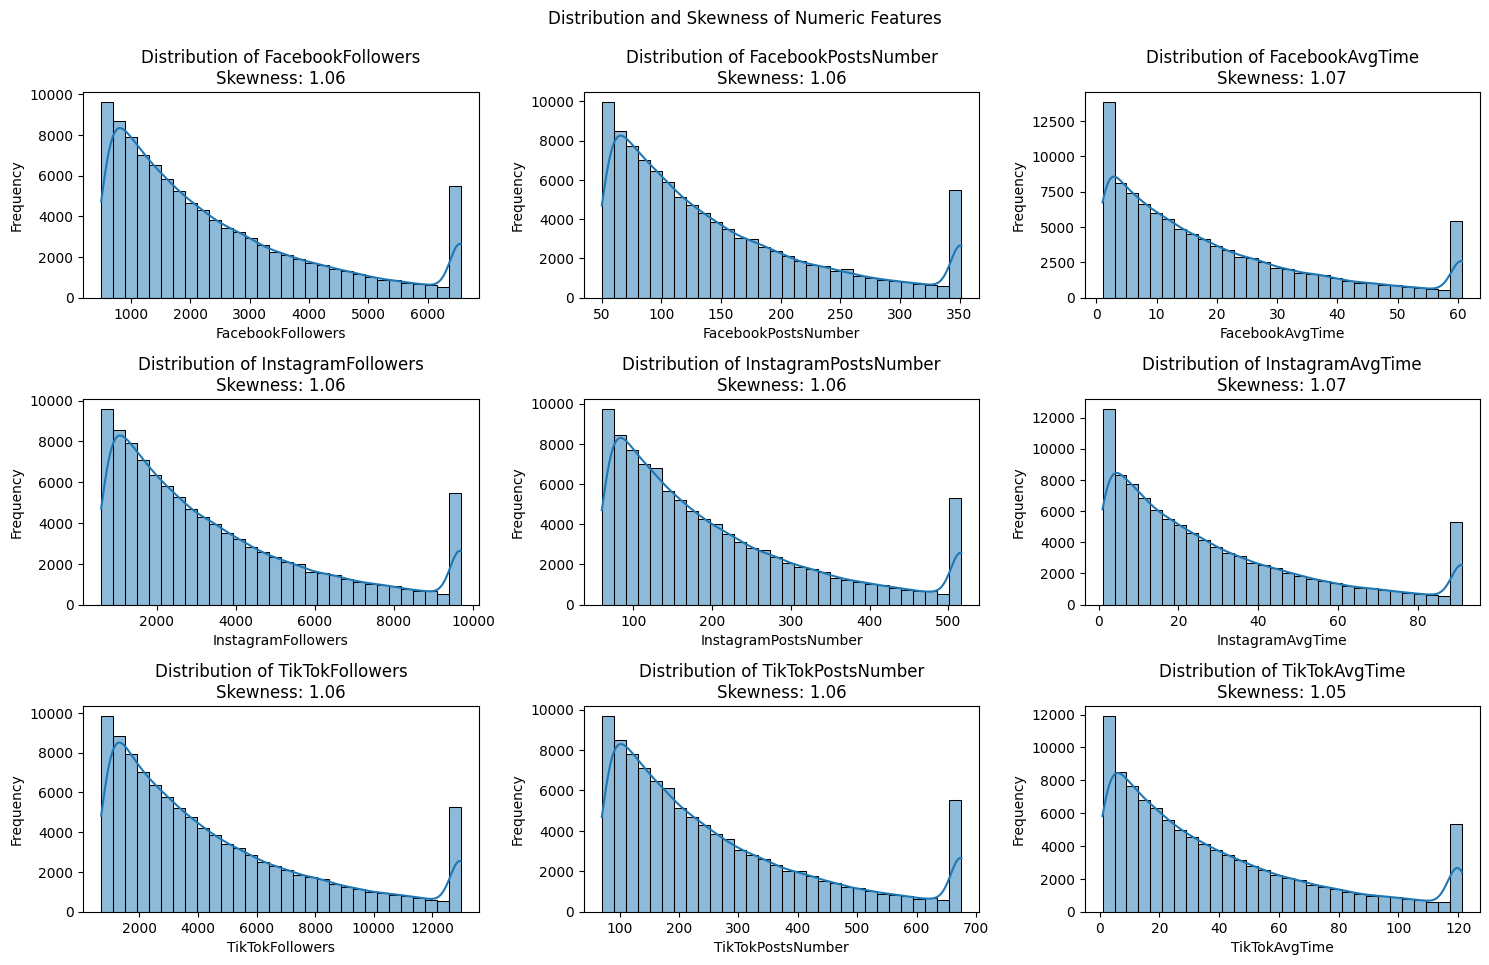

In [19]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True, bins=30, palette='Paired')
    plt.title(f'Distribution of {column}\nSkewness: {skewness_values[column]:.2f}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution and Skewness of Numeric Features', y=1.02)
plt.show()

## Log Transformation to Reduce Skewness


In [14]:
for col in numeric_columns:
    data[col] = np.log1p(data[col])

In [15]:
data

,Name,Gender,DOB,Interests,City,Country,FacebookFollowers,FacebookPostsNumber,FacebookAvgTime,InstagramFollowers,InstagramPostsNumber,InstagramAvgTime,TikTokFollowers,TikTokPostsNumber,TikTokAvgTime
0,Jesse Lawhorn,Female,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia,8.004032,5.641907,1.560371,6.408529,4.406719,2.155976,6.558198,4.624973,0.693147
1,Stacy Payne,Female,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya,7.570443,5.420535,3.157517,8.963544,4.219508,0.693147,8.829373,5.598422,4.160974
2,Katrina Nicewander,Female,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan,7.048386,5.056246,3.975972,6.542472,5.141664,4.522986,9.169623,6.516932,2.916344
3,Eric Yarbrough,Male,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy,6.763885,4.499810,2.089630,7.956477,4.564348,4.002863,9.469932,4.488636,3.485821
4,Daniel Adkins,Female,1955-09-18,"'Politics', 'History'",Biruaca,Venezuela,8.787602,5.081404,2.416757,7.932003,5.805135,2.947331,8.710784,5.407172,3.011505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Lionel Denault,Female,1983-07-31,'DIY and crafts',Dawan,China,6.249975,4.430817,2.764968,8.723394,5.627621,4.327518,9.466222,5.669881,3.152500
99996,Margie Mieszala,Female,1954-05-20,"'Cars and automobiles', 'Cooking', 'Outdoor ac...",Arcos de la Frontera,Spain,8.238273,4.927254,3.873556,8.159375,5.814131,2.925756,7.837160,5.049856,3.086592
99997,Joan Mercedes,Male,1975-06-06,"'Business and entrepreneurship', 'Cooking'",Los Andes,Chile,7.606387,5.365976,2.508547,9.178695,4.584967,3.337954,7.009409,4.983607,2.591304
99998,Marvin Massa,Female,1959-11-16,"'Gaming', 'Business and entrepreneurship', 'Fa...",Varjota,Brazil,6.733402,4.574711,0.717586,9.018574,4.727388,3.051317,7.147559,5.680173,4.495668


C:\Users\hamad\AppData\Local\Temp\ipykernel_4120\412022916.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column], kde=True, bins=30, palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_4120\412022916.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column], kde=True, bins=30, palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_4120\412022916.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column], kde=True, bins=30, palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_4120\412022916.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column], kde=True, bins=30, palette='Paired')
C:\Users\hamad\AppData\Local\Temp\ipykernel_4120\412022916.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column

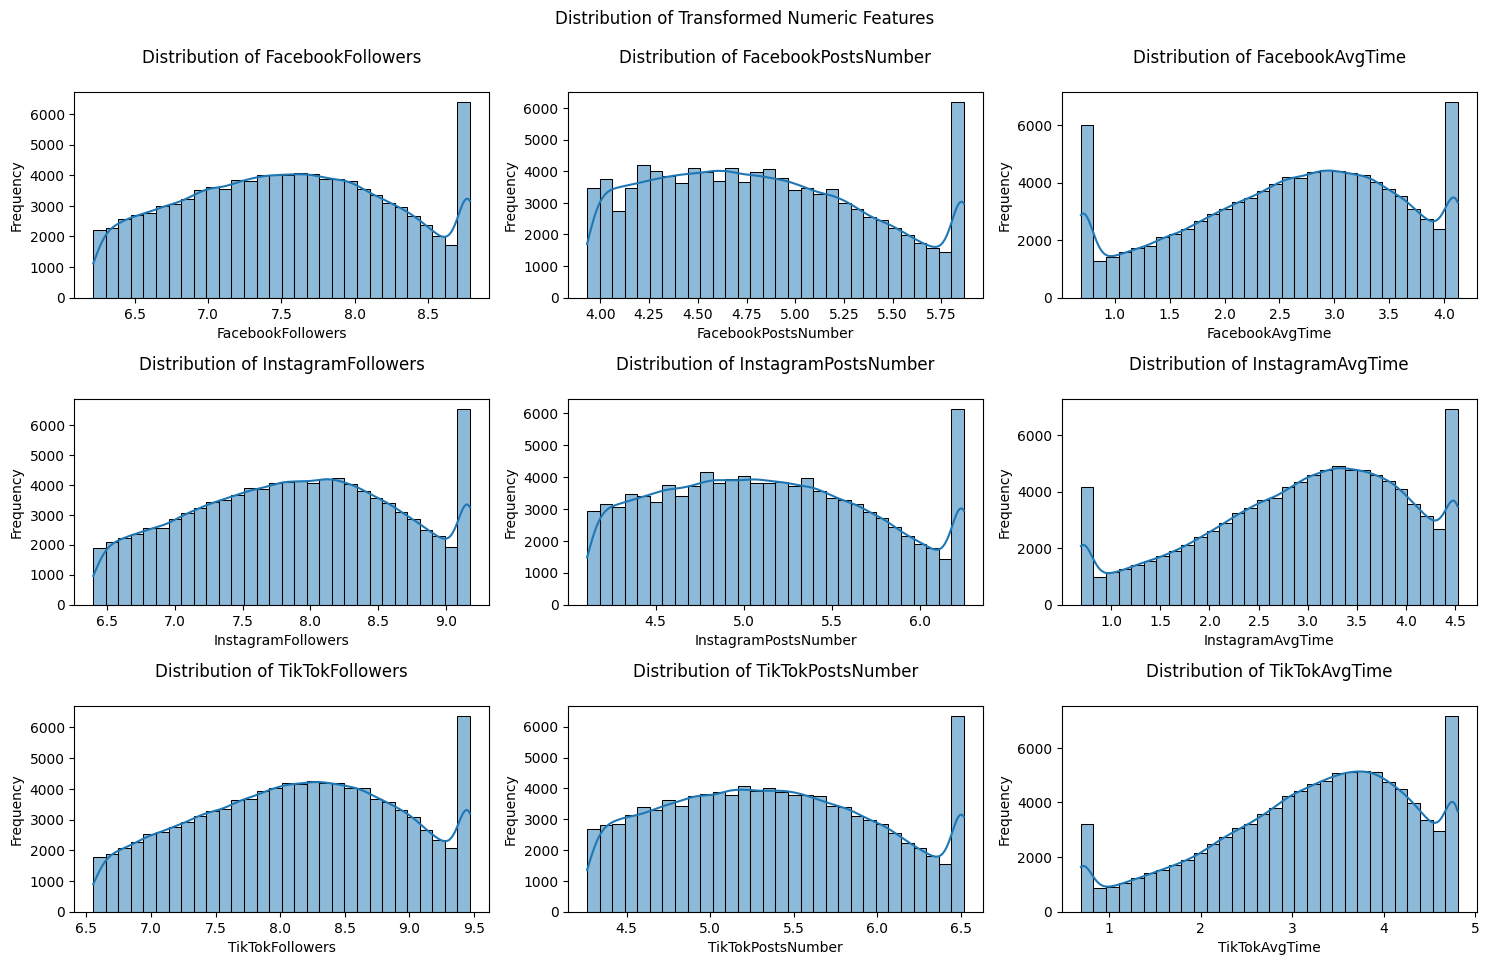

In [16]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True, bins=30, palette='Paired')
    plt.title(f'Distribution of {column}\n')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Distribution of Transformed Numeric Features', y=1.02)
plt.show()

## Feature Engineering

### Age Calculation and Age Grouping

In [15]:
current_year = datetime.now().year
data['YearOfBirth'] = pd.to_datetime(data['DOB']).dt.year
data['Age'] = current_year - data['YearOfBirth']
data.drop('DOB', axis=1, inplace=True)

In [16]:
data = data.drop("YearOfBirth", axis=1)

In [17]:
bins = [0, 30, 50, 100]
labels = ['Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

### Engagement Metrics Creation

In [18]:
data['TotalFacebookEngagement'] = data['FacebookFollowers'] * data['FacebookAvgTime']
data['TotalInstagramEngagement'] = data['InstagramFollowers'] * data['InstagramAvgTime']
data['TotalTikTokEngagement'] = data['TikTokFollowers'] * data['TikTokAvgTime']
data['TotalEngagement'] = (
    data['FacebookFollowers'] * data['FacebookAvgTime'] +
    data['InstagramFollowers'] * data['InstagramAvgTime'] +
    data['TikTokFollowers'] * data['TikTokAvgTime']
)

### Activity Intensity Feature

In [19]:
data['ActivityIntensity'] = (
    data['FacebookPostsNumber'] + data['InstagramPostsNumber'] + data['TikTokPostsNumber']
)

In [20]:
data.head()

,Name,Gender,Interests,City,Country,FacebookFollowers,FacebookPostsNumber,FacebookAvgTime,InstagramFollowers,InstagramPostsNumber,...,TikTokFollowers,TikTokPostsNumber,TikTokAvgTime,Age,AgeGroup,TotalFacebookEngagement,TotalInstagramEngagement,TotalTikTokEngagement,TotalEngagement,ActivityIntensity
0,Jesse Lawhorn,Female,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia,8.004032,5.641907,1.560371,6.408529,4.406719,...,6.558198,4.624973,0.693147,66,Senior,12.489259,13.816634,4.545796,30.851690,14.673599
1,Stacy Payne,Female,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya,7.570443,5.420535,3.157517,8.963544,4.219508,...,8.829373,5.598422,4.160974,20,Young Adult,23.903802,6.213055,36.738789,66.855646,15.238465
2,Katrina Nicewander,Female,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan,7.048386,5.056246,3.975972,6.542472,5.141664,...,9.169623,6.539586,2.916344,24,Young Adult,28.024189,31.376325,26.741771,86.142286,16.737495
3,Eric Yarbrough,Male,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy,6.763885,4.499810,2.089630,7.956477,4.564348,...,10.140692,4.488636,3.485821,39,Adult,14.134018,31.848687,35.348635,81.331340,13.552794
4,Daniel Adkins,Female,"'Politics', 'History'",Biruaca,Venezuela,8.807621,5.081404,2.416757,7.932003,5.805135,...,8.710784,5.407172,3.011505,69,Senior,21.285884,23.378235,26.232573,70.896692,16.293711


### Platform Preference and Dominance

In [21]:
data['InstagramToFacebookRatio'] = data['InstagramFollowers'] / data['FacebookFollowers']
data['TikTokToFacebookRatio'] = data['TikTokFollowers'] / data['FacebookFollowers']

In [22]:
def preferred_platform(row):
    platforms = {
        'Facebook': row['FacebookFollowers'],
        'Instagram': row['InstagramFollowers'],
        'TikTok': row['TikTokFollowers']
    }
    return max(platforms, key=platforms.get)

data['PreferredPlatform'] = data.apply(preferred_platform, axis=1)

In [23]:
total_followers = (
    data['FacebookFollowers'] + data['InstagramFollowers'] + data['TikTokFollowers']
)
data['FacebookDominance'] = data['FacebookFollowers'] / total_followers
data['InstagramDominance'] = data['InstagramFollowers'] / total_followers
data['TikTokDominance'] = data['TikTokFollowers'] / total_followers

In [24]:
data.head()

,Name,Gender,Interests,City,Country,FacebookFollowers,FacebookPostsNumber,FacebookAvgTime,InstagramFollowers,InstagramPostsNumber,...,TotalInstagramEngagement,TotalTikTokEngagement,TotalEngagement,ActivityIntensity,InstagramToFacebookRatio,TikTokToFacebookRatio,PreferredPlatform,FacebookDominance,InstagramDominance,TikTokDominance
0,Jesse Lawhorn,Female,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia,8.004032,5.641907,1.560371,6.408529,4.406719,...,13.816634,4.545796,30.851690,14.673599,0.800663,0.819362,Facebook,0.381676,0.305594,0.312731
1,Stacy Payne,Female,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya,7.570443,5.420535,3.157517,8.963544,4.219508,...,6.213055,36.738789,66.855646,15.238465,1.184018,1.166295,Instagram,0.298480,0.353405,0.348115
2,Katrina Nicewander,Female,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan,7.048386,5.056246,3.975972,6.542472,5.141664,...,31.376325,26.741771,86.142286,16.737495,0.928223,1.300953,TikTok,0.309677,0.287449,0.402875
3,Eric Yarbrough,Male,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy,6.763885,4.499810,2.089630,7.956477,4.564348,...,31.848687,35.348635,81.331340,13.552794,1.176318,1.499241,TikTok,0.272068,0.320038,0.407895
4,Daniel Adkins,Female,"'Politics', 'History'",Biruaca,Venezuela,8.807621,5.081404,2.416757,7.932003,5.805135,...,23.378235,26.232573,70.896692,16.293711,0.900584,0.989005,Facebook,0.346070,0.311665,0.342265


### Interests and Diacritic Removal

In [25]:
interest_categories = {
    'Entertainment': ['Movies', 'Music', 'Gaming', 'Sports', 'Photography', 'Fashion'],
    'Knowledge': ['Books', 'Science', 'Technology', 'Education and learning', 'History'],
    'Lifestyle': ['Food and dining', 'Health and wellness', 'Fitness', 'Parenting and family']
}
data['Interests'] = data['Interests'].apply(ast.literal_eval)
for category in interest_categories:
    data[category] = data['Interests'].apply(
        lambda interests: sum(1 for i in interests if i in interest_categories[category])
    )

In [26]:
data

,Name,Gender,Interests,City,Country,FacebookFollowers,FacebookPostsNumber,FacebookAvgTime,InstagramFollowers,InstagramPostsNumber,...,ActivityIntensity,InstagramToFacebookRatio,TikTokToFacebookRatio,PreferredPlatform,FacebookDominance,InstagramDominance,TikTokDominance,Entertainment,Knowledge,Lifestyle
0,Jesse Lawhorn,Female,"(Movies, Fashion, Fashion, Books)",Sibolga,Indonesia,8.004032,5.641907,1.560371,6.408529,4.406719,...,14.673599,0.800663,0.819362,Facebook,0.381676,0.305594,0.312731,3,1,0
1,Stacy Payne,Female,"(Gaming, Finance and investments, Outdoor acti...",Al Abyār,Libya,7.570443,5.420535,3.157517,8.963544,4.219508,...,15.238465,1.184018,1.166295,Instagram,0.298480,0.353405,0.348115,1,0,0
2,Katrina Nicewander,Female,"(DIY and crafts, Music, Science, Fashion)",Wādī as Sīr,Jordan,7.048386,5.056246,3.975972,6.542472,5.141664,...,16.737495,0.928223,1.300953,TikTok,0.309677,0.287449,0.402875,2,1,0
3,Eric Yarbrough,Male,"(Outdoor activities, Cars and automobiles)",Matera,Italy,6.763885,4.499810,2.089630,7.956477,4.564348,...,13.552794,1.176318,1.499241,TikTok,0.272068,0.320038,0.407895,0,0,0
4,Daniel Adkins,Female,"(Politics, History)",Biruaca,Venezuela,8.807621,5.081404,2.416757,7.932003,5.805135,...,16.293711,0.900584,0.989005,Facebook,0.346070,0.311665,0.342265,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Lionel Denault,Female,DIY and crafts,Dawan,China,6.249975,4.430817,2.764968,8.723394,5.627621,...,15.728319,1.395749,1.514602,TikTok,0.255732,0.356937,0.387331,0,0,0
99996,Margie Mieszala,Female,"(Cars and automobiles, Cooking, Outdoor activi...",Arcos de la Frontera,Spain,8.238273,4.927254,3.873556,8.159375,5.814131,...,15.791240,0.990423,0.951311,Facebook,0.339936,0.336680,0.323384,0,0,0
99997,Joan Mercedes,Male,"(Business and entrepreneurship, Cooking)",Los Andes,Chile,7.606387,5.365976,2.508547,9.437077,4.584967,...,14.934550,1.240678,0.921516,Instagram,0.316236,0.392347,0.291417,0,0,0
99998,Marvin Massa,Female,"(Gaming, Business and entrepreneurship, Fashio...",Varjota,Brazil,6.733402,4.574711,0.717586,9.018574,4.727388,...,14.982271,1.339379,1.061508,Instagram,0.294041,0.393832,0.312127,3,0,1


In [27]:
data = data.drop("Interests", axis=1)


In [28]:
import unicodedata
def remove_diacritics(text):
    if isinstance(text, str):  
        text = unicodedata.normalize('NFD', text)
        text = ''.join(char for char in text if unicodedata.category(char) != 'Mn')
        return text
    return text 

data['City'] = data['City'].apply(remove_diacritics)

In [29]:
data.head()

,Name,Gender,City,Country,FacebookFollowers,FacebookPostsNumber,FacebookAvgTime,InstagramFollowers,InstagramPostsNumber,InstagramAvgTime,...,ActivityIntensity,InstagramToFacebookRatio,TikTokToFacebookRatio,PreferredPlatform,FacebookDominance,InstagramDominance,TikTokDominance,Entertainment,Knowledge,Lifestyle
0,Jesse Lawhorn,Female,Sibolga,Indonesia,8.004032,5.641907,1.560371,6.408529,4.406719,2.155976,...,14.673599,0.800663,0.819362,Facebook,0.381676,0.305594,0.312731,3,1,0
1,Stacy Payne,Female,Al Abyar,Libya,7.570443,5.420535,3.157517,8.963544,4.219508,0.693147,...,15.238465,1.184018,1.166295,Instagram,0.298480,0.353405,0.348115,1,0,0
2,Katrina Nicewander,Female,Wadi as Sir,Jordan,7.048386,5.056246,3.975972,6.542472,5.141664,4.795791,...,16.737495,0.928223,1.300953,TikTok,0.309677,0.287449,0.402875,2,1,0
3,Eric Yarbrough,Male,Matera,Italy,6.763885,4.499810,2.089630,7.956477,4.564348,4.002863,...,13.552794,1.176318,1.499241,TikTok,0.272068,0.320038,0.407895,0,0,0
4,Daniel Adkins,Female,Biruaca,Venezuela,8.807621,5.081404,2.416757,7.932003,5.805135,2.947331,...,16.293711,0.900584,0.989005,Facebook,0.346070,0.311665,0.342265,0,1,0


In [32]:
# data.to_csv('Processed_SocialMedia1.csv', index=False)

In [33]:
data.columns

Index(['Name', 'Gender', 'City', 'Country', 'FacebookFollowers',
       'FacebookPostsNumber', 'FacebookAvgTime', 'InstagramFollowers',
       'InstagramPostsNumber', 'InstagramAvgTime', 'TikTokFollowers',
       'TikTokPostsNumber', 'TikTokAvgTime', 'Age', 'AgeGroup',
       'TotalFacebookEngagement', 'TotalInstagramEngagement',
       'TotalTikTokEngagement', 'TotalEngagement', 'ActivityIntensity',
       'InstagramToFacebookRatio', 'TikTokToFacebookRatio',
       'PreferredPlatform', 'FacebookDominance', 'InstagramDominance',
       'TikTokDominance', 'Entertainment', 'Knowledge', 'Lifestyle'],
      dtype='object')

### Data Scaling and Label Encoding

In [34]:
# numeric_columns = data.select_dtypes(include=['number']).columns
# scaler = MinMaxScaler()
# data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [35]:

data.head()

,Name,Gender,City,Country,FacebookFollowers,FacebookPostsNumber,FacebookAvgTime,InstagramFollowers,InstagramPostsNumber,InstagramAvgTime,...,ActivityIntensity,InstagramToFacebookRatio,TikTokToFacebookRatio,PreferredPlatform,FacebookDominance,InstagramDominance,TikTokDominance,Entertainment,Knowledge,Lifestyle
0,Jesse Lawhorn,Female,Sibolga,Indonesia,0.695227,0.884574,0.252924,0.003573,0.138366,0.381956,...,0.365415,0.096913,0.094840,Facebook,0.856243,0.292938,0.283616,0.6,0.2,0.0
1,Stacy Payne,Female,Al Abyar,Libya,0.526581,0.770065,0.718727,0.922610,0.050808,0.000000,...,0.455994,0.609187,0.541237,Instagram,0.313963,0.599855,0.505073,0.2,0.0,0.0
2,Katrina Nicewander,Female,Wadi as Sir,Jordan,0.323525,0.581629,0.957428,0.051752,0.482097,1.000000,...,0.692737,0.267370,0.714500,TikTok,0.386946,0.176461,0.847789,0.4,0.2,0.0
3,Eric Yarbrough,Male,Matera,Italy,0.212866,0.293801,0.407281,0.560369,0.212089,0.864192,...,0.185689,0.598896,0.842037,TikTok,0.190981,0.442626,0.776452,0.0,0.0,0.0
4,Daniel Adkins,Female,Biruaca,Venezuela,1.000000,0.594643,0.502687,0.551566,0.792401,0.588584,...,0.625207,0.233178,0.316018,Facebook,0.620806,0.333488,0.470145,0.0,0.2,0.0


In [34]:
# scaler = StandardScaler()  
# numeric_columns = data.select_dtypes(include=['number']).columns
# data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [34]:
data.head()

,Name,Gender,City,Country,FacebookFollowers,FacebookPostsNumber,FacebookAvgTime,InstagramFollowers,InstagramPostsNumber,InstagramAvgTime,...,ActivityIntensity,InstagramToFacebookRatio,TikTokToFacebookRatio,PreferredPlatform,FacebookDominance,InstagramDominance,TikTokDominance,Entertainment,Knowledge,Lifestyle
0,Jesse Lawhorn,Female,Sibolga,Indonesia,0.653356,1.485634,-1.071709,-1.954729,-1.230718,-0.770330,...,-0.656139,-1.787783,-1.822796,Facebook,2.437331,-1.108374,-1.211888,2.886260,0.789724,-0.606624
1,Stacy Payne,Female,Al Abyar,Libya,0.038597,1.079314,0.577744,1.437444,-1.544310,-2.191089,...,-0.103568,0.917605,0.537569,Instagram,-0.867966,0.719675,0.113268,0.425817,-0.678083,-0.606624
2,Katrina Nicewander,Female,Wadi as Sir,Jordan,-0.701597,0.410674,1.423005,-1.776899,0.000365,1.528607,...,1.340677,-0.887577,1.453716,TikTok,-0.423121,-1.802129,2.164010,1.656038,0.789724,-0.606624
3,Eric Yarbrough,Male,Matera,Italy,-1.104975,-0.610644,-0.525117,0.100408,-0.966679,1.023442,...,-1.752551,0.863259,2.128076,TikTok,-1.617569,-0.216810,1.737147,-0.804405,-0.678083,-0.606624
4,Daniel Adkins,Female,Biruaca,Venezuela,1.764335,0.456852,-0.187276,0.067916,1.111725,-0.001734,...,0.928712,-1.068147,-0.653296,Facebook,1.002297,-0.866853,-0.095734,-0.804405,0.789724,-0.606624


In [35]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {} 
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le 



In [36]:

data.head()

,Name,Gender,City,Country,FacebookFollowers,FacebookPostsNumber,FacebookAvgTime,InstagramFollowers,InstagramPostsNumber,InstagramAvgTime,...,ActivityIntensity,InstagramToFacebookRatio,TikTokToFacebookRatio,PreferredPlatform,FacebookDominance,InstagramDominance,TikTokDominance,Entertainment,Knowledge,Lifestyle
0,41743,0,19809,98,0.653356,1.485634,-1.071709,-1.954729,-1.230718,-0.770330,...,-0.656139,-1.787783,-1.822796,0,2.437331,-1.108374,-1.211888,2.886260,0.789724,-0.606624
1,82367,0,352,121,0.038597,1.079314,0.577744,1.437444,-1.544310,-2.191089,...,-0.103568,0.917605,0.537569,1,-0.867966,0.719675,0.113268,0.425817,-0.678083,-0.606624
2,49533,0,22860,109,-0.701597,0.410674,1.423005,-1.776899,0.000365,1.528607,...,1.340677,-0.887577,1.453716,2,-0.423121,-1.802129,2.164010,1.656038,0.789724,-0.606624
3,27236,1,13257,104,-1.104975,-0.610644,-0.525117,0.100408,-0.966679,1.023442,...,-1.752551,0.863259,2.128076,2,-1.617569,-0.216810,1.737147,-0.804405,-0.678083,-0.606624
4,17805,0,2778,237,1.764335,0.456852,-0.187276,0.067916,1.111725,-0.001734,...,0.928712,-1.068147,-0.653296,0,1.002297,-0.866853,-0.095734,-0.804405,0.789724,-0.606624


In [52]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
scaled_encoded_data = data.copy()

categorical_columns = scaled_encoded_data.select_dtypes(include=['object']).columns

label_encoders = {}  
for column in categorical_columns:
    le = LabelEncoder()
    scaled_encoded_data[column] = le.fit_transform(scaled_encoded_data[column])
    label_encoders[column] = le

numeric_columns = scaled_encoded_data.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()
scaled_encoded_data[numeric_columns] = scaler.fit_transform(scaled_encoded_data[numeric_columns])
scaled_encoded_data.head()


,Name,Gender,City,Country,FacebookFollowers,FacebookPostsNumber,FacebookAvgTime,InstagramFollowers,InstagramPostsNumber,InstagramAvgTime,...,TikTokToFacebookRatio,PreferredPlatform,FacebookDominance,InstagramDominance,TikTokDominance,Entertainment,Knowledge,Lifestyle,Cluster,TotalSocialMediaEngagement
0,0.450891,0.0,0.812644,0.403292,0.695227,0.884574,0.252924,0.003573,0.138366,0.381956,...,0.094840,0.0,0.856243,0.292938,0.283616,0.6,0.2,0.0,0.0,0.197880
1,0.889694,0.0,0.014440,0.497942,0.526581,0.770065,0.718727,0.922610,0.050808,0.000000,...,0.541237,0.5,0.313963,0.599855,0.505073,0.2,0.0,0.0,1.0,0.742835
2,0.535035,0.0,0.937808,0.448560,0.323525,0.581629,0.957428,0.051752,0.482097,1.000000,...,0.714500,1.0,0.386946,0.176461,0.847789,0.4,0.2,0.0,0.5,0.419917
3,0.294192,1.0,0.543855,0.427984,0.212866,0.293801,0.407281,0.560369,0.212089,0.864192,...,0.842037,1.0,0.190981,0.442626,0.776452,0.0,0.0,0.0,0.5,0.597302
4,0.192322,0.0,0.113965,0.975309,1.000000,0.594643,0.502687,0.551566,0.792401,0.588584,...,0.316018,0.0,0.620806,0.333488,0.470145,0.0,0.2,0.0,1.0,0.751151


## Data Aggergation

In [30]:
location_counts = data.groupby(['Country', 'City']).size().reset_index(name='Counts')
location_counts = location_counts.sort_values('Counts', ascending=False).head(20)

In [31]:
platform_age_group = pd.crosstab(data['PreferredPlatform'], data['AgeGroup'])

In [32]:
interest_count = data[['Entertainment', 'Knowledge', 'Lifestyle']].sum()

Preferred Platform Distribution

C:\Users\hamad\AppData\Local\Temp\ipykernel_15388\590364884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['PreferredPlatform'], palette='Paired')


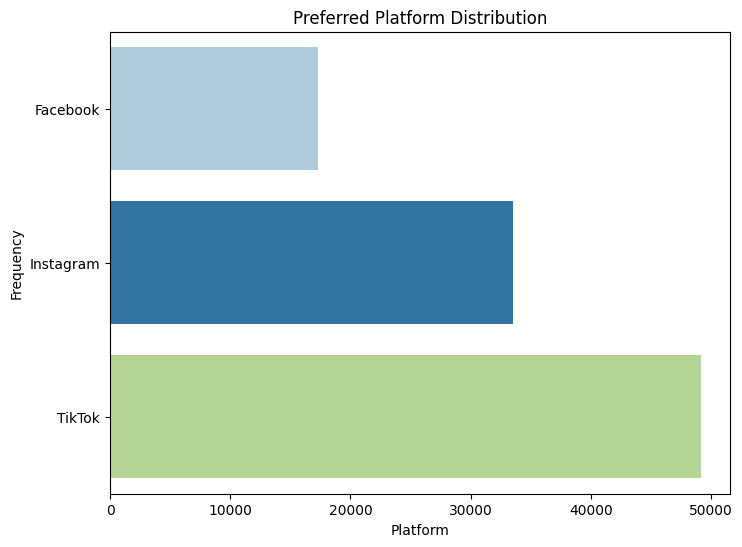

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data['PreferredPlatform'], palette='Paired')
plt.title("Preferred Platform Distribution")
plt.ylabel("Frequency")
plt.xlabel("Platform")
plt.show()


Gender Distribution

C:\Users\hamad\AppData\Local\Temp\ipykernel_15752\408019479.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='Paired')


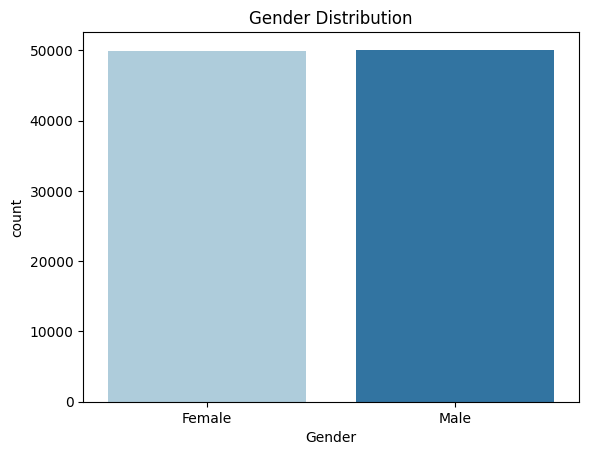

In [36]:
sns.countplot(x='Gender', data=data, palette='Paired')
plt.title('Gender Distribution')
plt.show()

Platform Dominance Plot

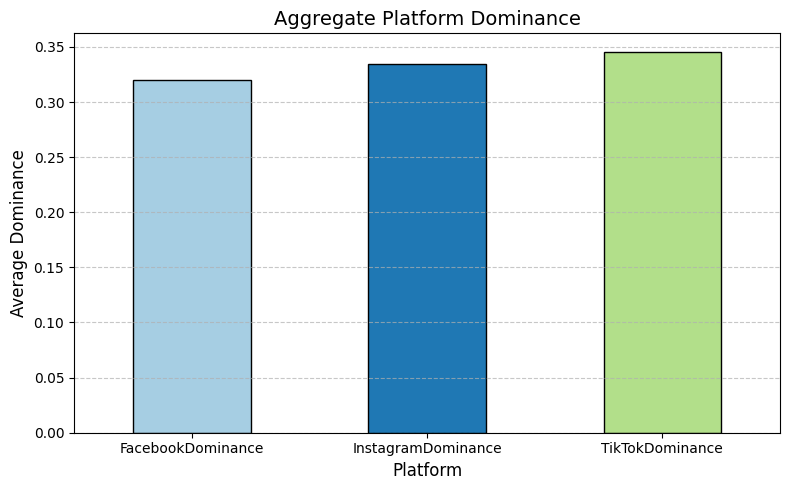

In [ ]:
dominance_columns = ['FacebookDominance', 'InstagramDominance', 'TikTokDominance']
platform_dominance = data[dominance_columns].mean()
plt.figure(figsize=(8, 5))
colors = plt.cm.Paired(range(3)) 
platform_dominance.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Aggregate Platform Dominance', fontsize=14)
plt.ylabel('Average Dominance', fontsize=12)
plt.xlabel('Platform', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Top 20 City-Country Combinations by Count

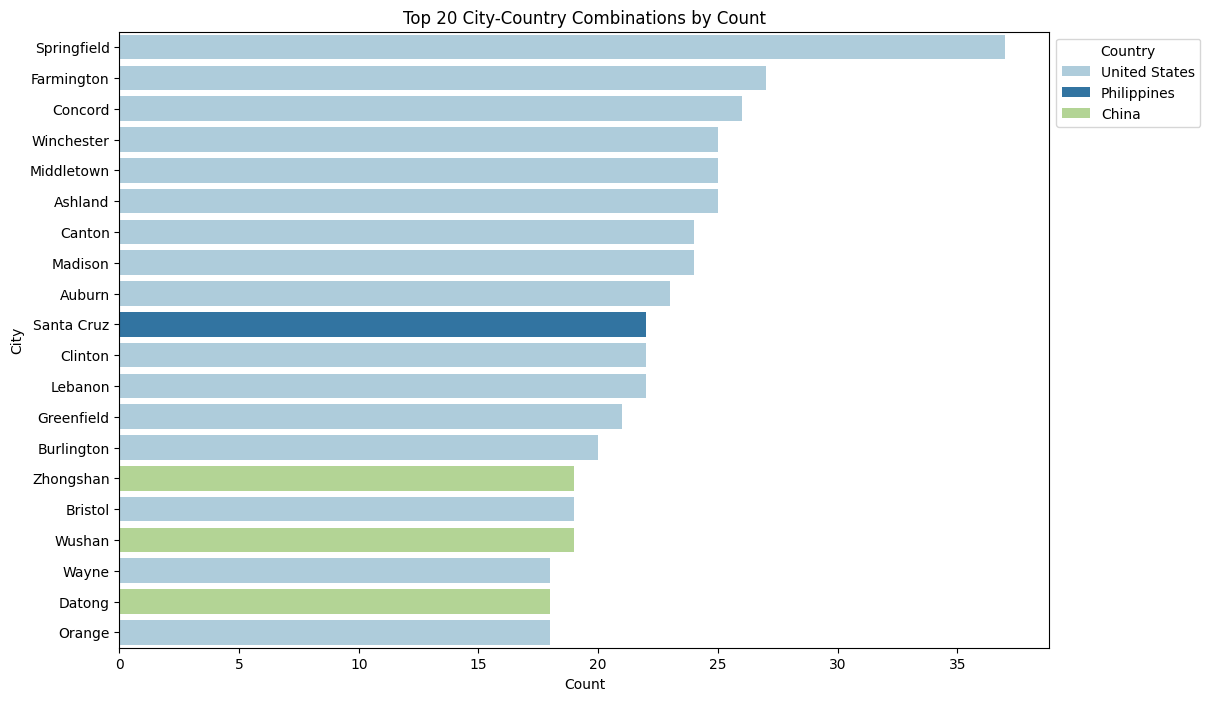

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Counts', y='City', hue='Country', data=location_counts, palette='Paired')
plt.title('Top 20 City-Country Combinations by Count')
plt.xlabel('Count')
plt.ylabel('City')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()


Preferred Platform Distribution by Age Group

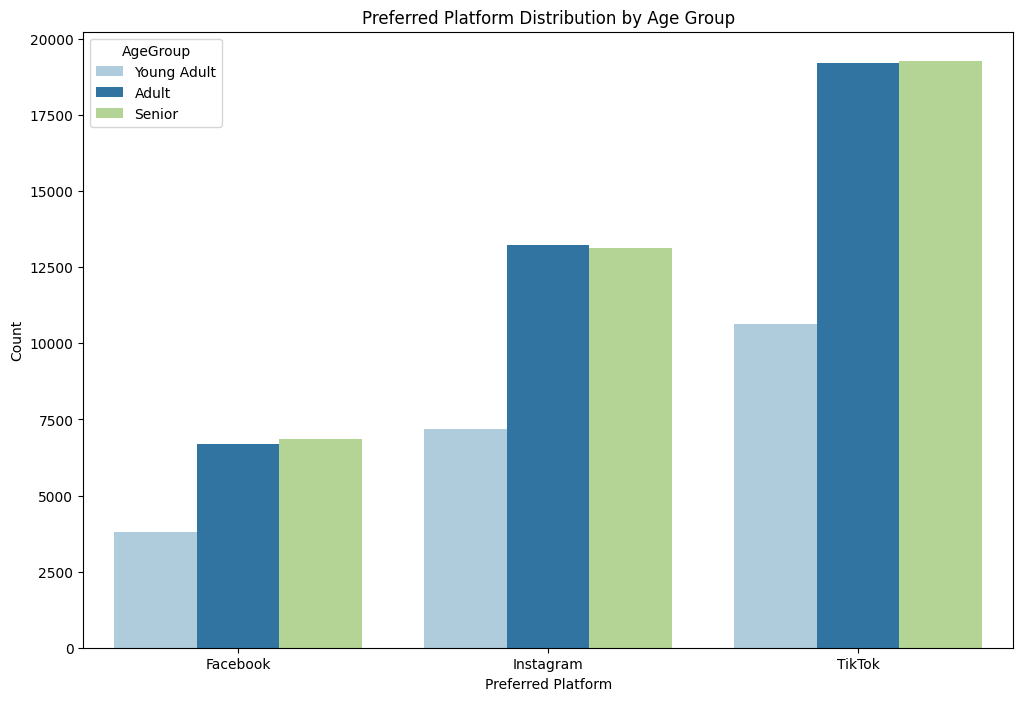

In [55]:
plt.figure(figsize=(12, 8))
sns.countplot(x='PreferredPlatform', hue='AgeGroup', data=data, palette='Paired')
plt.title('Preferred Platform Distribution by Age Group')
plt.xlabel('Preferred Platform')
plt.ylabel('Count')
plt.show()


KDE of Total Engagement by Platform

C:\Users\hamad\AppData\Local\Temp\ipykernel_2900\3099257577.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\hamad\AppData\Local\Temp\ipykernel_2900\3099257577.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\hamad\AppData\Local\Temp\ipykernel_2900\3099257577.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\hamad\AppData\Local\Temp\ipykernel_2900\3099257577.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\hamad\AppData\Local\Temp\ipykernel_2900\3099257577.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\hamad\AppData\Local\Temp\ipyk

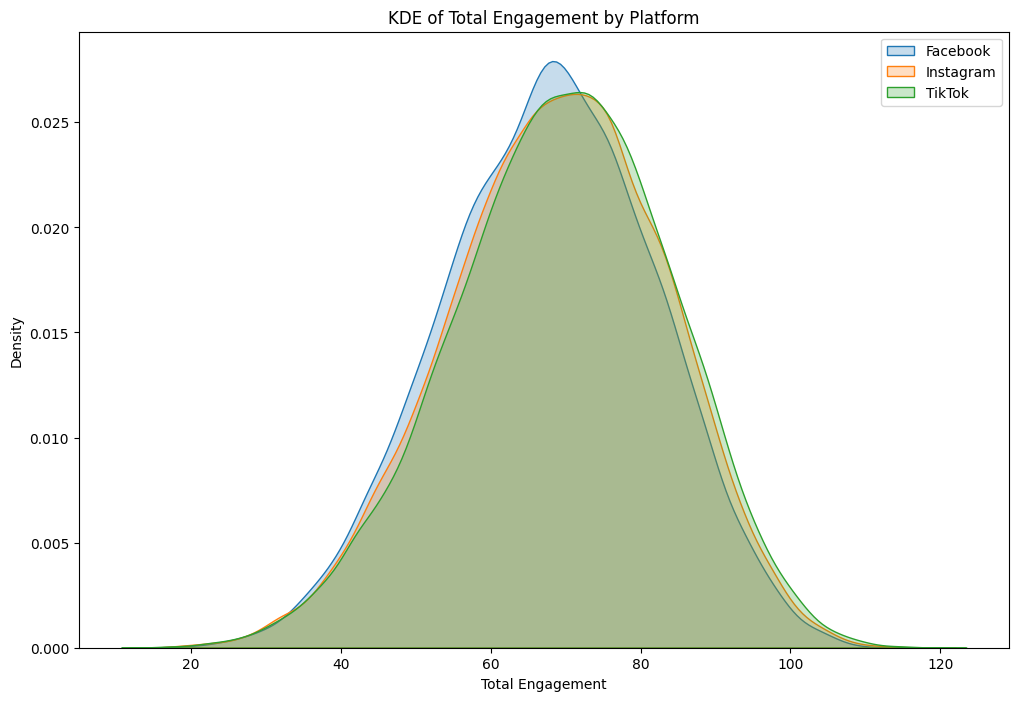

In [44]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data[data['PreferredPlatform'] == 'Facebook']['TotalEngagement'], label='Facebook', shade=True, palette="Paired")
sns.kdeplot(data[data['PreferredPlatform'] == 'Instagram']['TotalEngagement'], label='Instagram', shade=True, palette="Paired")
sns.kdeplot(data[data['PreferredPlatform'] == 'TikTok']['TotalEngagement'], label='TikTok', shade=True, palette="Paired")
plt.title('KDE of Total Engagement by Platform')
plt.xlabel('Total Engagement')
plt.ylabel('Density')
plt.legend()
plt.show()

Platform Preference by Age Group

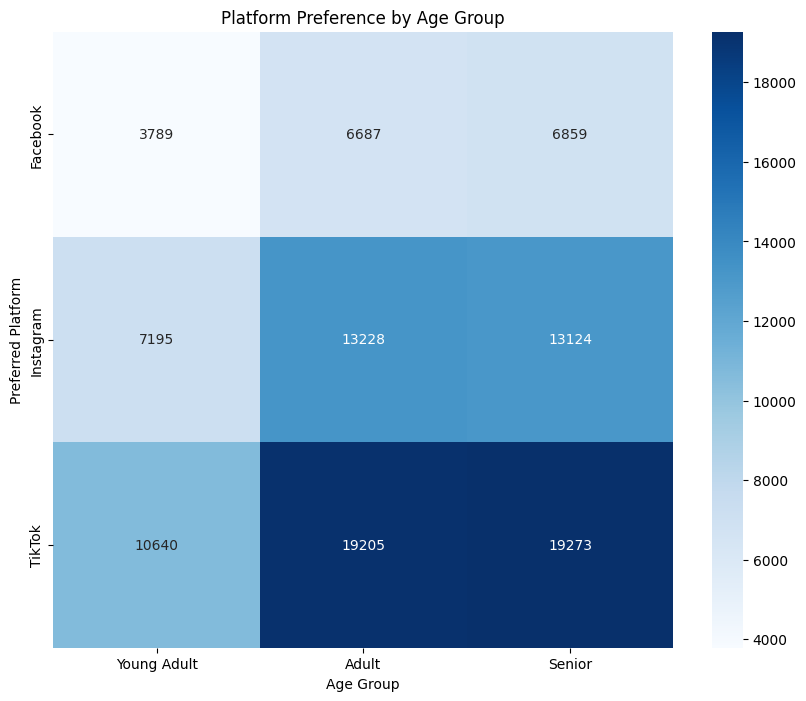

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(platform_age_group, annot=True, cmap='Blues', fmt='d')
plt.title('Platform Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Preferred Platform')
plt.show()


Interest Distribution Across Users

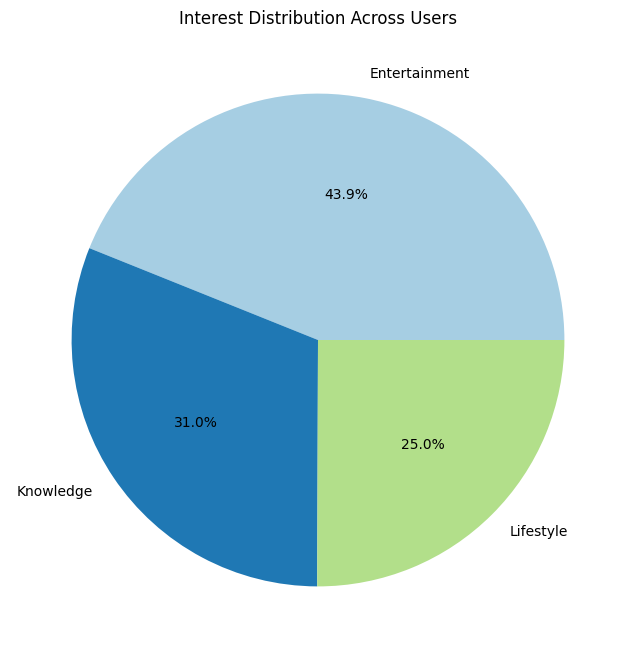

In [ ]:
colors = sns.color_palette("Paired", n_colors=len(interest_count))
plt.figure(figsize=(8, 8))
plt.pie(interest_count, labels=interest_count.index, autopct='%1.1f%%', colors=colors)
plt.title('Interest Distribution Across Users')
plt.show()


Engagement Across Interest Categories

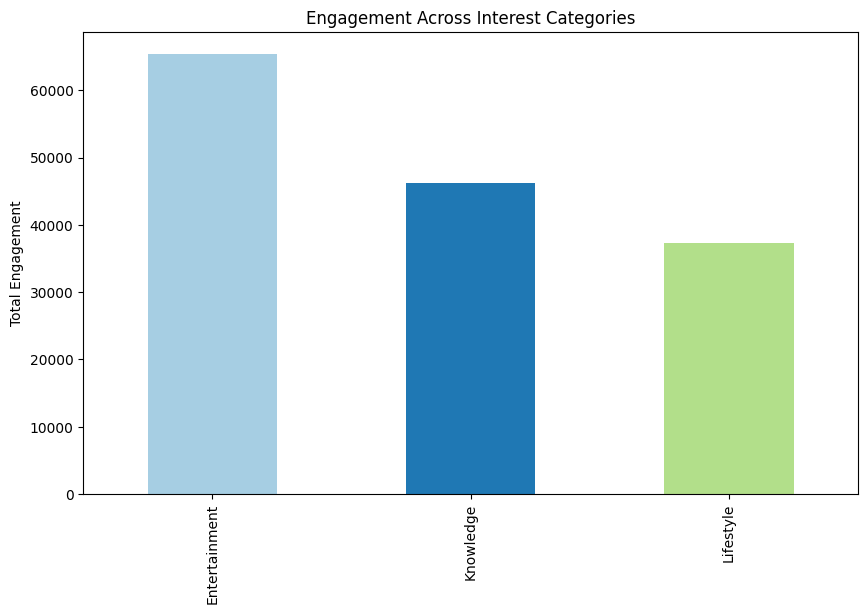

In [ ]:
colors = sns.color_palette("Paired", n_colors=len(interest_count))
plt.figure(figsize=(10, 6))
interest_count.plot(kind='bar', color=colors)
plt.title('Engagement Across Interest Categories')
plt.ylabel('Total Engagement')
plt.show()


Correlation Between Social Media Engagement and Interest Categories

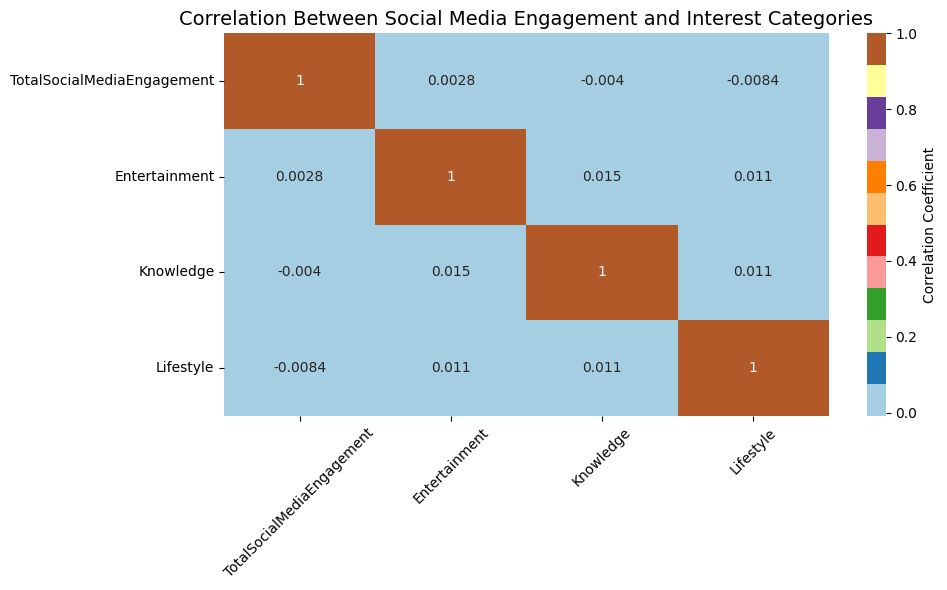

In [40]:
data['TotalSocialMediaEngagement'] = (
    data['FacebookFollowers'] + data['InstagramFollowers'] + data['TikTokFollowers']
)
plt.figure(figsize=(10, 6))
sns.heatmap(
    data[['TotalSocialMediaEngagement', 'Entertainment', 'Knowledge', 'Lifestyle']].corr(),
    annot=True,
    cmap='Paired',  
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Between Social Media Engagement and Interest Categories', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()
